# Tennis Ace

Codecademy project from the Data Science Path to determine the best features that define the best tennis players using Linear Regression.

The data is provided in a csv file called tennis_stats.csv containing data from the men’s professional tennis league, which is called the ATP (Association of Tennis Professionals). Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes.

## Import libraries

In [218]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

## Exploratory analysis

### Transforming data into a pandas dataframe

In [ ]:
df = pd.read_csv('tennis_stats.csv')

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

### More information on data

- <b>Player:</b> name of the tennis player
- <b>Year:</b> year data was recorded

#### Service Game Columns (Offensive)

- <b>Aces:</b> number of serves by the player where the receiver does not touch the ball
- <b>DoubleFaults:</b> number of times player missed both first and second serve attempts
- <b>FirstServe:</b> % of first-serve attempts made
- <b>FirstServePointsWon:</b> % of first-serve attempt points won by the player
- <b>SecondServePointsWon:</b> % of second-serve attempt points won by the player
- <b>BreakPointsFaced:</b> number of times where the receiver could have won service game of the player
- <b>BreakPointsSaved:</b> % of the time the player was able to stop the receiver from winning service game when they had the chance
- <b>ServiceGamesPlayed:</b> total number of games where the player served
- <b>ServiceGamesWon:</b> total number of games where the player served and won
- <b>TotalServicePointsWon:</b> % of points in games where the player served that they won

#### Return Game Columns (Defensive)

- <b>FirstServeReturnPointsWon:</b> % of opponents first-serve points the player was able to win
- <b>SecondServeReturnPointsWon:</b> % of opponents second-serve points the player was able to win
- <b>BreakPointsOpportunities:</b> number of times where the player could have won the service game of the opponent
- <b>BreakPointsConverted:</b> % of the time the player was able to win their opponent’s service game when they had the chance
- <b>ReturnGamesPlayed:</b> total number of games where the player’s opponent served
- <b>ReturnGamesWon:</b> total number of games where the player’s opponent served and the player won
- <b>ReturnPointsWon:</b> total number of points where the player’s opponent served and the player won
- <b>TotalPointsWon:</b> % of points won by the player

#### Outcomes

- <b>Wins:</b> number of matches won in a year
- <b>Losses:</b> number of matches lost in a year
- <b>Winnings:</b> total winnings in USD($) in a year
- <b>Ranking:</b> ranking at the end of year

### Descriptive statistics 

In [242]:
df.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


### Correlation coefficients into a heatmap

<AxesSubplot:>

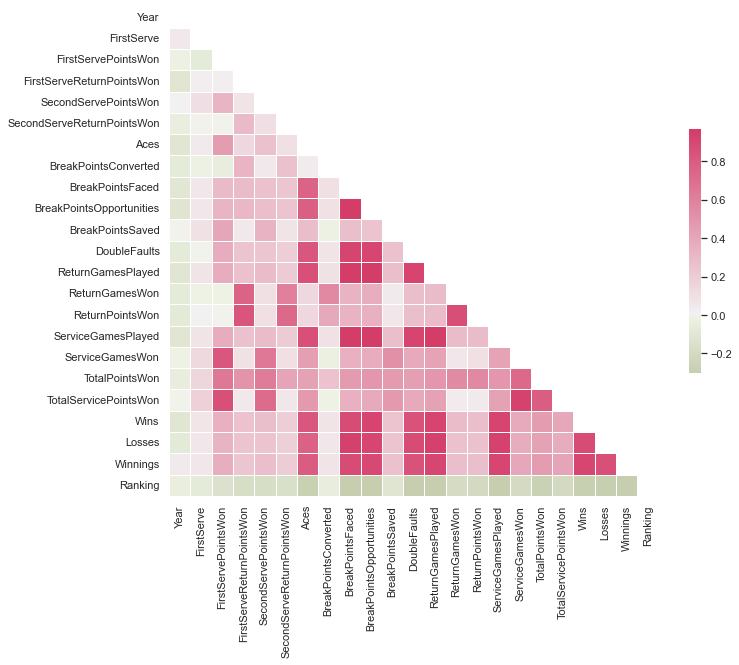

In [239]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a diverging colormap
cmap =sb.diverging_palette(100, 0, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, robust=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Correlation analysis

From the correlation plot, we can list a series of features that are strongly correlated with the different outcomes.

Considering the Winnings, Wins and Losses outcomes, we observe a strong correlation with the offensive features Aces, BreakPointsFaced, BreakPointsOpportunities and DoubleFaults. But also a strong correlation with the defesive ones: ReturnGamesPlayed and ServiceGamesPlayed. On the other hand, Ranking does not a strong correlation with any of the features.

In [279]:
features = [
    'Aces',
    'BreakPointsFaced',            
    'BreakPointsOpportunities',
    'DoubleFaults',
    'ReturnGamesPlayed',
    'ServiceGamesPlayed']

In [280]:
outcomes = ['Wins','Winnings']

In [281]:
#### Visualisation of correlation between features and Wins and Winnings

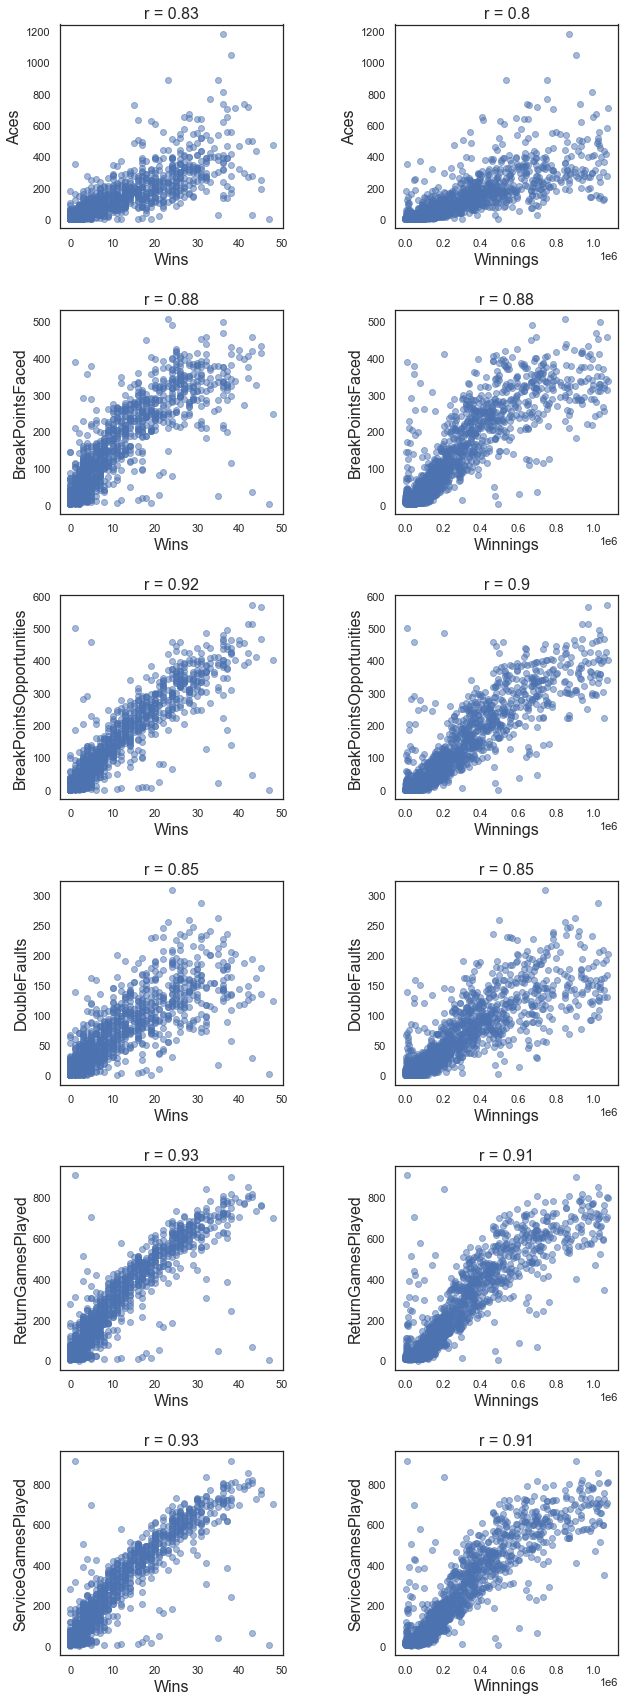

In [282]:
plt.figure(figsize=(10, 30))
plt.subplots_adjust(wspace=0.5, hspace=0.4)

for i in range(len(features)):
    for j in range(len(outcomes)):
        plt.subplot(len(features), len(outcomes), 1+i*len(outcomes)+j)
        plt.scatter(df[outcomes[j]], df[features[i]], alpha=0.5)
        plt.xlabel(outcomes[j], fontsize=16)
        plt.ylabel(features[i], fontsize=16)
        plt.title(f'r = {round(df[features[i]].corr(df[outcomes[j]]),2)}', fontsize=16)

plt.savefig('features_vs_outcomes.png')        
plt.show()
plt.close()

## Machine Learning model: Linear Regression

### Create a linear regression model using with a single feature

In [223]:
class Score:
    def __init__(self,score,mse,mae):
        self.score = score
        self.mse = mse
        self.mae = mae

In [358]:
def calculate_score(feature,outcome):
    X = df[feature].to_numpy().reshape(-1, 1)
    y = df[outcome].to_numpy().reshape(-1, 1)

    # Set random_state=19 to compare with other models
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=19)

    model = make_pipeline(
        MinMaxScaler((0, 1)),
        LinearRegression(fit_intercept=True)
    )

    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    r2score = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    score = Score(r2score,mse,mae)
    
    plot_model_predictions(feature,outcome,model,X_train, y_train,X_test,y_test,y_pred,r2score)
    
    return score

def plot_model_predictions(feature,outcome,model,X_train, y_train, X_test,y_test,y_pred, r2score):
    plt.figure(figsize=(10, 4))
    plt.subplots_adjust(wspace=0.5, hspace=0.4)
    
    plt.subplot(1,2,1)
    plt.title(f'Feature: {feature}')
    corr = df[feature].corr(df[outcome])
    plt.scatter(X_train, y_train, label='Train',alpha=0.5)
    plt.plot(X_train, model.predict(X_train), label='Prediction',c='r')
    plt.title(f'r = {round(corr,2)}', fontsize=16)
    plt.xlabel(feature, fontsize=16)
    plt.ylabel(outcome, fontsize=16)
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title(f'Feature: {feature}\n$R^{2}$={round(r2score,2)}', fontsize=16)
    plt.scatter(y_test,y_pred,alpha=0.5, c='r')
    plt.ylabel('Predicted ' + outcome, fontsize=16)
    plt.xlabel('Actual ' + outcome, fontsize=16)
    
    plt.show();


#### Result for Outcome='Wins'

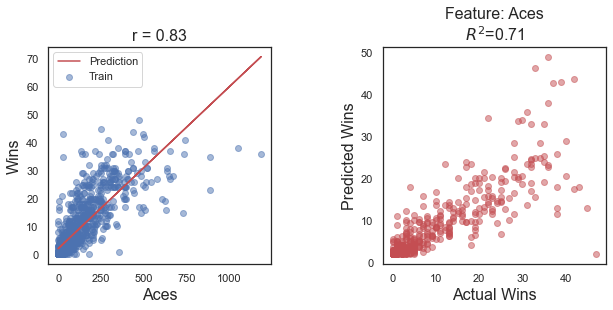

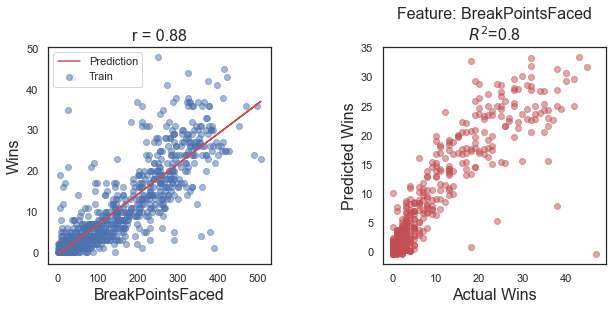

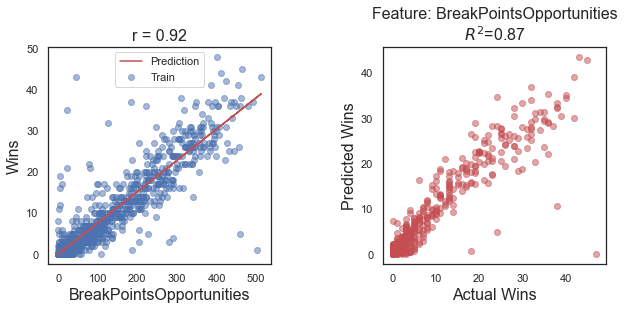

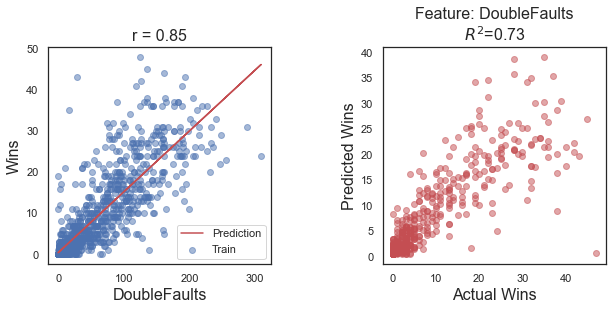

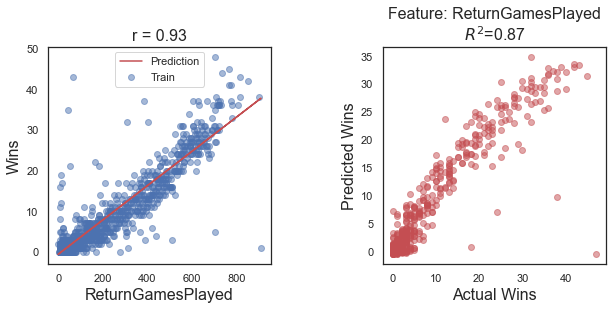

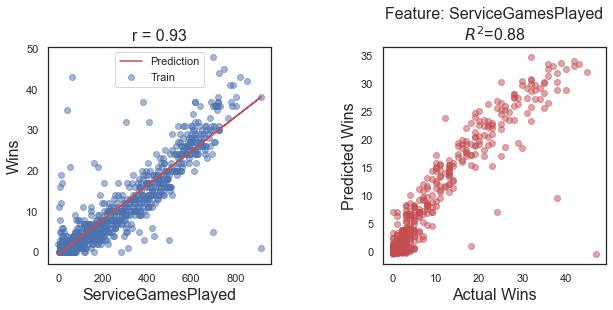

In [365]:
result = [calculate_score(f,'Wins') for f in features]

In [361]:
metrics_report = pd.DataFrame(columns=['r2 score','MSE','MAE'])

for i in range(len(result)):
    metrics_report.loc[features[i], :] = [result[i].score, result[i].mse, result[i].mae]

print(metrics_report.sort_values(by='r2 score',ascending=False))

                          r2 score        MSE       MAE
ServiceGamesPlayed        0.876165  14.554191  1.971576
ReturnGamesPlayed         0.874594   14.73879  1.990374
BreakPointsOpportunities  0.871391  15.115236  2.053953
BreakPointsFaced          0.804035  23.031552  2.695974
DoubleFaults               0.72587   32.21812  3.293296
Aces                      0.709837   34.10249  3.701673


<b> Conclusion:</b> The best features to predict Winings are BreakPointsFaced, ReturnGamesPlayed, ServiceGamesPlayed and BreakPointsOpportunities.

#### Result for Outcome='Winnings'

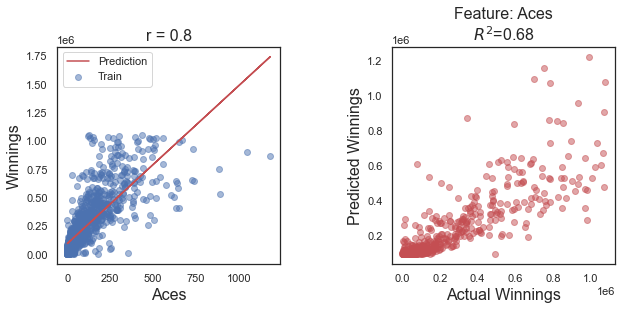

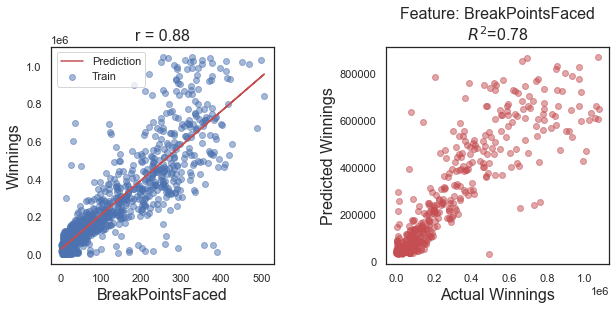

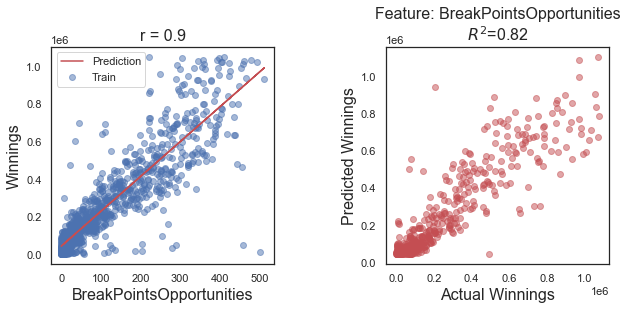

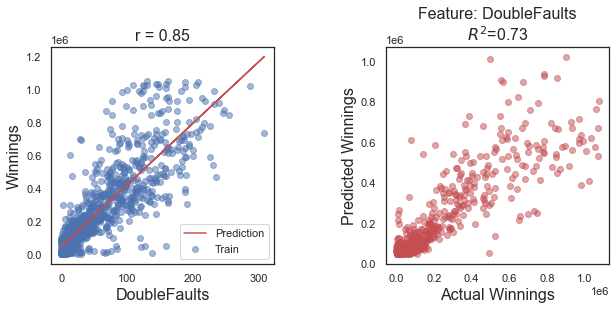

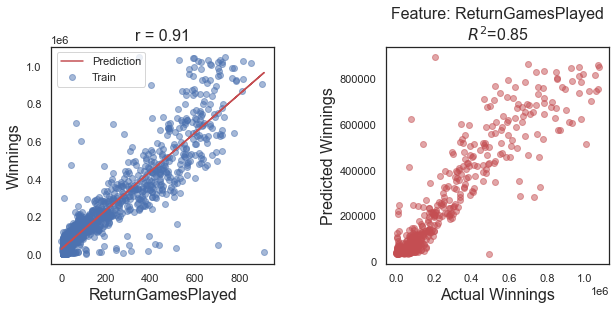

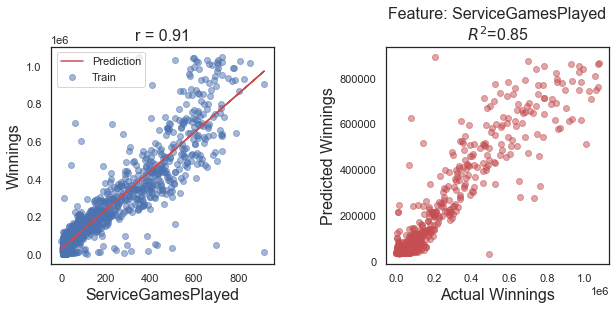

In [366]:
result = [calculate_score(f,'Winnings') for f in features]

In [284]:
metrics_report = pd.DataFrame(columns=['r2 score','MSE','MAE'])

for i in range(len(result)):
    metrics_report.loc[features[i], :] = [result[i].score, result[i].mse, result[i].mae]

print(metrics_report.sort_values(by='r2 score',ascending=False))

                          r2 score        MSE       MAE
BreakPointsFaced          0.899109   8.724145  1.905384
ReturnGamesPlayed          0.88256  10.155214  2.115258
ServiceGamesPlayed        0.878779  10.482118  2.152163
BreakPointsOpportunities  0.837812  14.024597  2.569235
DoubleFaults              0.776212  19.351215  3.060853
Aces                      0.610622  33.669991  4.387782


We obtain a similar conclusion for the 'Wins' outcome.

#### Models predictions vs actual data

### Creating a linear regression model with two features

In [383]:
def calculate_score_two_features(feature1, feature2, outcome):
    X = df[[feature1,feature2]].to_numpy().reshape(-1, 2)
    y = df[outcome].to_numpy().reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=19)

    model = LinearRegression()
    model.fit(X_train,y_train)

    prediction = model.predict(X_test)
    r2score = r2_score(y_test,prediction)
    mse = mean_squared_error(y_test,prediction)
    mae = mean_absolute_error(y_test,prediction)
    
    score = Score(r2score,mse,mae)
    
    return score

def print_score(outcome):
    scores = []
    two_features = []
    for i in range(len(features)):
        for j in range(i+1,len(features)):
            score = calculate_score_two_features(features[i],features[j],outcome)
            scores.append(score)
            two_features.append((features[i],features[j]))


    metrics_report = pd.DataFrame(columns=['Feature1', 'Feature2', 'r2 score'])

    for i in range(len(two_features)):
        metrics_report.loc[i] = [
            two_features[i][0],
            two_features[i][1],
            f'{scores[i].score:.3f}',
            #f'{scores[i].mse:.2f}',
            #f'{scores[i].mae:.2f}'
            ]

    print(metrics_report.sort_values(by='r2 score',ascending=False).head(5))

#### Score for Outcome='Wins'

In [384]:
print_score('Wins')

                    Feature1                  Feature2 r2 score
1                       Aces  BreakPointsOpportunities    0.893
8           BreakPointsFaced        ServiceGamesPlayed    0.882
11  BreakPointsOpportunities        ServiceGamesPlayed    0.882
7           BreakPointsFaced         ReturnGamesPlayed    0.881
10  BreakPointsOpportunities         ReturnGamesPlayed    0.881


#### Score for Outcome='Winnings'

In [385]:
print_score('Winnings')

             Feature1            Feature2 r2 score
8    BreakPointsFaced  ServiceGamesPlayed    0.851
7    BreakPointsFaced   ReturnGamesPlayed    0.850
4                Aces  ServiceGamesPlayed    0.848
14  ReturnGamesPlayed  ServiceGamesPlayed    0.848
3                Aces   ReturnGamesPlayed    0.847


<b> Conclusion: </b> For the outcome 'Wins' and 'Winnings', the score is high enough (>0.8) to say with confidence the above features combinations good enough to predict the best tennins players.

### Model with multiple features

In [395]:
features = ['Aces','BreakPointsOpportunities','ServiceGamesPlayed']
def calculate_score_all_features(outcome):
    X = np.array(df[features])
    y = np.array(df[outcome])
    y = np.reshape(y, (-1,1))
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=19)

    model = LinearRegression()
    model.fit(X_train,y_train)

    prediction = model.predict(X_test)
    r2score = r2_score(y_test,prediction)
    mse = mean_squared_error(y_test,prediction)
    mae = mean_absolute_error(y_test,prediction)
    
    score = Score(r2score,mse,mae)
    
    return score

#### Calculating score for 'Wins'

In [396]:
score = calculate_score_all_features('Wins')
print(f'r2_score = {score.score:.2f}\t mse = {score.mse:.2f} \t mae = {score.mae:.2f}')

r2_score = 0.89	 mse = 12.58 	 mae = 1.80


#### Calculating score for 'Winnings'

In [394]:
score = calculate_score_all_features('Winnings')
print(f'r2_score = {score.score:.2f}\t mse = {score.mse:.2f} \t mae = {score.mae:.2f}')

r2_score = 0.85	 mse = 10806254960.53 	 mae = 64436.04
